<a href="https://colab.research.google.com/github/NSworks/Knowledge-Engineering/blob/main/s19048_12c_PRO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Zadania klasyfikacji - perceptron, regresja logistyczna


Proszę nie używać dostępnych w bibliotekach klasyfikatorów.


## plot_decision_regions

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

        # konfiguruje generator znaczników i mapę kolorów
        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))])

        # rysuje wykres powierzchni decyzyjnej
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        # rysuje wykres wszystkich próbek
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')


##1. Używając perceptronów napisz klasyfikator wielo-klasowy (klasyfikujący 3 lub więcej klas). Dla każdej z klas użyj klasyfikatora binarnego. Przykład klasyfikatora binarnego znajduje się poniżej.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

class Perceptron(object):

    # Konstruktor, podajemy współczynik uczenia sie oraz ilość epok
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1+ X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update *xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


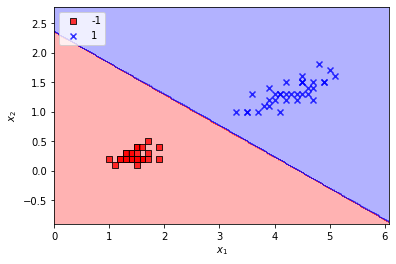

In [ ]:
def main():
    # pobiera danne do uczenia i testowania
    iris = datasets.load_iris()
    X = iris.data[:, [2, 3]]
    y = iris.target
    # podział danych na testowe i treningowe
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

    # selekcja danych z klas 0 i 1
    X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
    y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
    # w perceptronie wyjście jest albo 1 albo -1    
    y_train_01_subset[(y_train_01_subset == 0)] = -1
    ppn = Perceptron(eta=0.1, n_iter=10)
    # uczenie modelu
    ppn.fit(X_train_01_subset, y_train_01_subset)

    # wyświetla wykres
    plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=ppn)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper left')
    plt.show()
    

if __name__ == '__main__':
    main()

##2. Napisz klasyfikator wielo-klasowy przy użyciu regresji logistycznej. Dla każdej z klas użyj klasyfikatora binarnego. Przykład regresji logistycznej dla przypadku dwuklasowego znajduje się poniżej.

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split


class LogisticRegressionGD(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


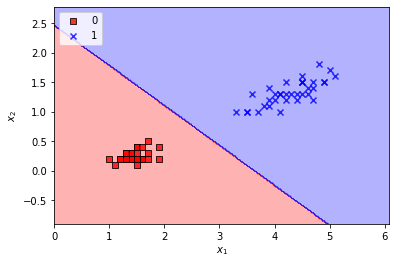

In [ ]:
def main():
    iris = datasets.load_iris()
    X = iris.data[:, [2, 3]]
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

    #w regresji logarytmicznej wyjście przyjmuje wartości 0 lub 1 (prawdopodobieństwa)
    X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
    y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
    lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
    lrgd.fit(X_train_01_subset, y_train_01_subset)
    plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper left')
    plt.show()


if __name__ == '__main__':
    main()

##3. Dla regresji logistycznej napisz metodę wypisującą prawdopodobieństwo przynależności próbki (próbek) do danej klasy (klas).

# Program

**Ćwiczenie 1**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


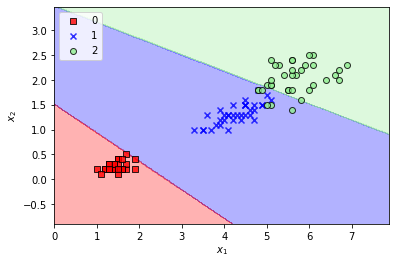

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split


class Perceptron(object):

    def __init__(self, eta=0.1, n_iter=1000):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, x, y):
        self.w_ = np.zeros(1 + x.shape[1])

        for _ in range(self.n_iter):
            for xi, target in zip(x, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
        return self

    def net_input(self, x):
        return np.dot(x, self.w_[1:]) + self.w_[0]

    def predict(self, x):
        return np.where(self.net_input(x) >= 0.0, 1, -1)

#klasyfikator wieloklasowy
class Classifier():

    def __init__(self, ppn1, ppn2):
      #klasyfikatory binarne
        self.ppn1 = ppn1
        self.ppn2 = ppn2

    def predict(self, X):
        return np.where(self.ppn1.predict(X) == 1, 0, np.where(self.ppn2.predict(X) == 1, 2, 1))
        #sprawdzamy czy klasyfikator nalezy do klasy, nadanie etykiet klas z danych net input

def main():

    iris = datasets.load_iris()
    X = iris.data[:, [2, 3]]
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    #importowanie etykiet
    y_train_01_subset = y_train.copy()
    y_train_02_subset = y_train.copy()

    y_train_01_subset[(y_train == 1) | (y_train == 2)] = -1
    y_train_01_subset[(y_train_01_subset == 0)] = 1

    y_train_02_subset[(y_train == 1) | (y_train == 0)] = -1
    y_train_02_subset[(y_train_02_subset == 2)] = 1

    #tworzenie perceptronów
    ppn1 = Perceptron()
    ppn2 = Perceptron()

    # wytrenowanie modelu na danych przez porownanie wartosci oczekiwanej z tym co analizujemy
    ppn1.fit(X_train, y_train_01_subset)
    ppn2.fit(X_train, y_train_02_subset)
    #multiklasyfikator
    classifier = Classifier(ppn1, ppn2)

    #dzielenie obszaru na klasy
    plot_decision_regions(X_train, y_train, classifier=classifier)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper left')
    plt.show()


if __name__ == '__main__':
    main()



**Ćwiczenie 2 i 3**

y=  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
y_train_01_subset =  [0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0]
y_train_02_subset =  [0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0
 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1
 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
#1 accuracy:  100.0 %
#2 accuracy:  94.28571428571428 %
Total accuracy: 94.28571428571428%


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[9.82782034e-05 9.82782034e-05 6.32025163e-05 1.52816973e-04
 9.82782034e-05 1.80665328e-03 2.17459535e-04 1.52816973e-04
 9.82782034e-05 6.90613331e-05 1.52816973e-04 2.37614442e-04
 4.44127422e-05 1.18115672e-05 4.06449031e-05 7.47926730e-04
 3.09437854e-04 2.17459535e-04 8.17206995e-04 3.38114749e-04
 3.69448268e-04 7.47926730e-04 1.68089389e-05 3.98930427e-03
 8.92898940e-04 2.37614442e-04 1.16256403e-03 1.52816973e-04
 9.82782034e-05 2.37614442e-04 2.37614442e-04 7.47926730e-04
 6.90613331e-05 9.82782034e-05 1.52816973e-04 4.06449031e-05
 6.32025163e-05 4.44127422e-05 6.32025163e-05 1.52816973e-04
 1.39853742e-04 1.39853742e-04 6.32025163e-05 5.66760649e-03
 4.35752320e-03 2.17459535e-04 2.37614442e-04 9.82782034e-05
 1.52816973e-04 9.82782034e-05 9.99999653e-01 9.99999621e-01
 9.99999935e-01 9.99983111e-01 9.99999756e-01 9.99998143e-01
 9.99999929e-01 9.95991810e-01 9.99998806e-01 9.99988132e-01
 9.98338523e-01 9.99998574e-01 9.99817002e-01 9.99999653e-01
 9.99901255e-01 9.999986

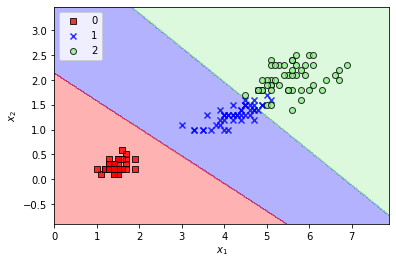

In [ ]:
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class LogisticRegressionGD(object):
    def __init__(self, eta=0.1, n_iter=2000, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.4, scale=0.1, size=1 + X.shape[1])

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
        return self

    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    #sprawdzenie na wyjściu czy należy do klasy / softmax [0-1]
    #zwraca wartości na osi X w funkcji sigmoidalnej
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    #binarne sprawdzenie

    def printProbability(self, irisInput):
        print("Class probability:")
        print(self.activation(self.net_input(irisInput)))
        print()

class MultiLogisticRegression: #klasyfikator wieloklasowy
    def __init__(self, clas1, clas2):
        self.clas1 = clas1
        self.clas2 = clas2

    def predict(self, x):
        return np.where(self.clas1.predict(x) == 0, 0, np.where(self.clas2.predict(x) == 1, 2, 1))

def main():
    iris = datasets.load_iris()
    x = iris.data[:, [2, 3]] #wyciągamy elementy
    y = iris.target
    print('y= ', y)

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

    #importowanie etykiet
    y_train_01_subset = y_train.copy()
    y_train_02_subset = y_train.copy()
    x_train_01_subset = x_train.copy()
    x_train_02_subset = x_train.copy()


    #modyfikowanie etykiet
    y_train_01_subset[(y_train_01_subset == 2)] = 1

    y_train_02_subset[(y_train == 1)] = 0
    y_train_02_subset[(y_train_02_subset == 2)] = 1

    print('y_train_01_subset = ', y_train_01_subset)
    print('y_train_02_subset = ', y_train_02_subset)

    # tworzenie n-1 klasyfikatorów
    # wytrenowanie modelu na danych przez porownanie wartosci oczekiwanej z tym co analizujemy
    lrgd = LogisticRegressionGD()
    lrgd.fit(x_train_01_subset, y_train_01_subset)
    lrgd2 = LogisticRegressionGD()
    lrgd2.fit(x_train_02_subset, y_train_02_subset)
    

    y_1_predict = lrgd.predict(x_train)
    y_2_predict = lrgd2.predict(x_train)

    accuracy_1 = accuracy_score(y_1_predict, y_train_01_subset)*100
    accuracy_3 = accuracy_score(y_2_predict, y_train_02_subset)*100
    print("#1 accuracy: ", accuracy_1, '%')
    print("#2 accuracy: ", accuracy_3, '%')

    if accuracy_1 > accuracy_3:
        y_results = np.where(y_1_predict == 0, 0, np.where(y_2_predict == 1, 2, 1))
    else:
        y_results = np.where(y_2_predict == 1, 2, np.where(y_1_predict == 1, 0, 1))
    print('Total accuracy: ', accuracy_score(y_results, y_train)*100, '%', sep="")
    #

    # multiklasyfikator
    mu = MultiLogisticRegression(lrgd, lrgd2)
    plot_decision_regions(x, y, classifier=mu)
    method(x, lrgd, lrgd2)

    #dzielenie obszaru na klasy na podstawie regresji logistycznej
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper left')
    plt.show()

#metoda wypisująca prawdopodobieństwo przynależności próbki próbek do klas
def method(x, r1, r2):
    print(r1.activation(r1.net_input(x)))
    print(r2.activation(r2.net_input(x)))

if __name__ == '__main__':
    main()